In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [3]:
# Read our city and rider data into pandas and merge them

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

city_rides_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display the data table for preview


In [7]:
# group by City_Type, Total Number of Rides and Average Fare
by_city_type_df = city_rides_df.groupby(['city','type'],as_index=False).agg(
    {'ride_id':'count','fare':'mean','driver_count':'sum'})

#* Average Fare ($) Per City
#* Total Number of Rides Per City
#* Total Number of Drivers Per City
#* City Type (Urban, Suburban, Rural)

by_city_df = by_city_type_df.rename(columns={
                                        'ride_id': 'Total_Rides', 
                                        'fare': 'Average_Fare',
                                        'driver_count': 'No_of_Drivers'})


## Bubble Plot of Ride Sharing Data

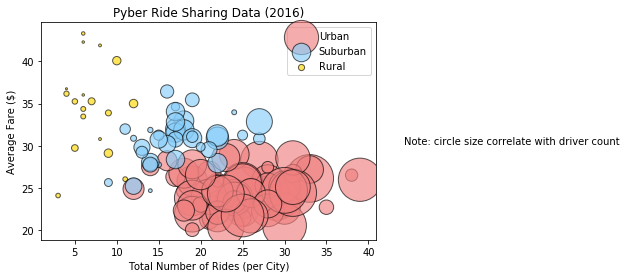

In [18]:
Urban = by_city_df[(by_city_df["type"]=="Urban")]
Rural = by_city_df[(by_city_df["type"]=="Rural")]
Suburban = by_city_df[(by_city_df["type"]=="Suburban")]

Ux_rides = Urban['Total_Rides']
Uy_fare = Urban['Average_Fare']
Us_driver = Urban['No_of_Drivers']


Rx_rides = Rural['Total_Rides']
Ry_fare = Rural['Average_Fare']
Rs_driver = Rural['No_of_Drivers']

Sx_rides = Suburban['Total_Rides']
Sy_fare = Suburban['Average_Fare']
Ss_driver = Suburban['No_of_Drivers']

# The size of each point on our plot is determined by average fare

plt.scatter(Ux_rides, Uy_fare, marker='o', edgecolor='black',
            s=Us_driver, c='lightcoral', alpha=0.65,label='Urban')

plt.scatter(Sx_rides, Sy_fare, marker='o', edgecolor='black',
            s=Ss_driver, c='lightskyblue', alpha=0.65,label='Suburban')

plt.scatter(Rx_rides, Ry_fare, marker='o', edgecolor='black',
            s=Rs_driver, c='gold', alpha=0.65,label='Rural')
# Incorporate the other graph properties

# Create a legend

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")


# Incorporate a text label regarding circle size
plt.legend(loc='upper right')
plt.text(70,30,'Note: circle size correlate with driver count',
 verticalalignment='bottom', horizontalalignment='right')
# Save Figure
plt.savefig("../Images/PyberFaresV1.png")

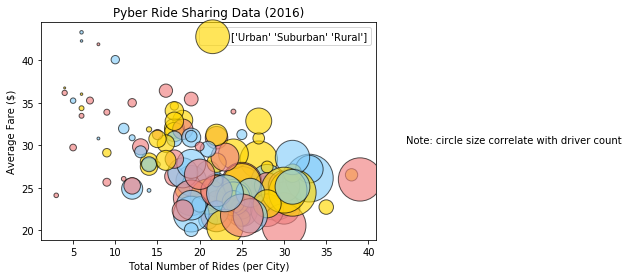

In [5]:
x_no_city = 120

# List of values from 0 to 100 each value being 1 greater than the last

Urban = by_city_df[(by_city_df["type"]=="Urban")]
Rural = by_city_df[(by_city_df["type"]=="Rural")]
Suburban = by_city_df[(by_city_df["type"]=="Suburban")]

x_rides = by_city_df['Total_Rides']
y_fare = by_city_df['Average_Fare']
s_driver = by_city_df['No_of_Drivers']
c_type = by_city_df["type"].unique()

colors = ["gold", "lightskyblue", "lightcoral"]

# Build the scatter plots for each city types

# The size of each point on our plot is determined by average fare

plt.scatter(x_rides, y_fare, marker='o', edgecolor='black',
            s=s_driver, c=colors, alpha=0.65,label=c_type)

# Incorporate the other graph properties

# Create a legend

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")


# Incorporate a text label regarding circle size
plt.legend(loc='upper right')
plt.text(70,30,'Note: circle size correlate with driver count',
 verticalalignment='bottom', horizontalalignment='right')
# Save Figure
plt.savefig("../Images/PyberFaresV2.png")


In [6]:
# Show plot


plt.show()

## Total Fares by City Type

In [16]:
by_fare_type_df = city_rides_df.groupby(['type'],as_index=False).agg(
    {'ride_id':'count','fare':'sum','driver_count':'sum'})

by_fare_type_df

,type,ride_id,fare,driver_count
0,Rural,125,4327.93,537
1,Suburban,625,19356.33,8570
2,Urban,1625,39854.38,59602


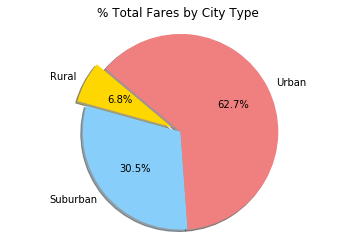

In [11]:
# Calculate Type Percents

# Count how many times each maker appears in our group
c_type = by_fare_type_df['type']
fares = by_fare_type_df['fare']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(fares, explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% Total Fares by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyberFares.png")
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

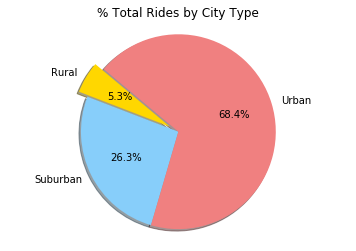

In [12]:

# Calculate Type Percents

# Count how many times each maker appears in our group
c_type = by_fare_type_df['type']
rides = by_fare_type_df['ride_id']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(rides, explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% Total Rides by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyberRides.png")
plt.show()

In [19]:
# Show Figure
plt.show()

## Total Drivers by City Type

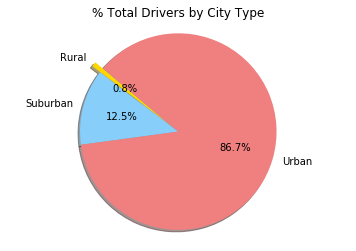

In [13]:
# Calculate Type Percents

# Count how many times each maker appears in our group
c_type = by_fare_type_df['type']
drivers = by_fare_type_df['driver_count']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(drivers, explode=explode, labels=c_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("% Total Drivers by City Type")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PyberDrivers.png")
plt.show()


In [20]:
# Show Figure
plt.show()